In [847]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import collections
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.cluster import KMeans

n_clusters=8 #number of Cluster

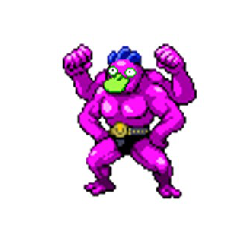

In [848]:
INPUT=np.array(Image.open('/home/dedekinds/deep-photo-styletransfer-tf/examples/input/gl.jpg'))
plt.imshow(INPUT)
plt.axis('off')
plt.show()

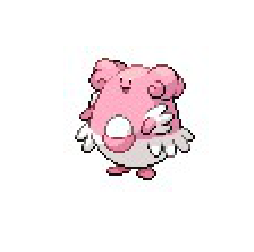

In [849]:
OUTPUT=np.array(Image.open('/home/dedekinds/deep-photo-styletransfer-tf/examples/style/xfd.jpg'))
plt.imshow(OUTPUT)
plt.axis('off')
plt.show()

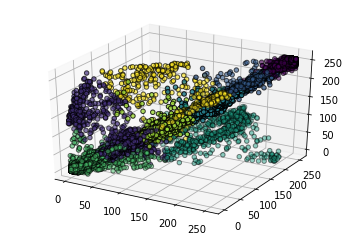

In [850]:
#input
INPUT_temp = INPUT.reshape(-1,3)
est = KMeans(n_clusters=n_clusters)
est.fit(INPUT_temp)
labels = est.labels_


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(INPUT_temp[:, 0], INPUT_temp[:, 1], INPUT_temp[:, 2],c=labels.astype(np.float), edgecolor='k')
plt.show()

In [851]:
print (est.cluster_centers_)
print(collections.Counter(labels))
INPUT_centers = est.cluster_centers_
INPUT_label_nums = collections.Counter(labels)
INPUT_labels = est.labels_

[[254.55660945 254.63580979 254.52536344]
 [ 84.45216401  15.52687927  97.81230068]
 [228.72208639 169.72697637 230.02200489]
 [244.6025398   21.55022745 243.57695224]
 [147.30822711 201.98261877  61.3580533 ]
 [ 28.66733467  14.88543754  27.48630595]
 [164.75468317   4.68577944 166.33800293]
 [134.8538206  126.65697674 159.67774086]]
Counter({0: 54823, 6: 6139, 3: 5277, 1: 4393, 5: 2990, 2: 1229, 7: 1202, 4: 863})


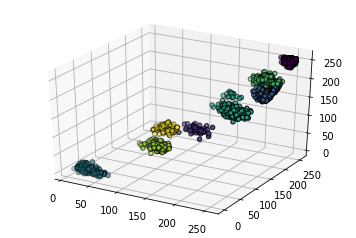

In [852]:
#output
OUPUT_temp = OUTPUT.reshape(-1,3)
est = KMeans(n_clusters=n_clusters)
est.fit(OUPUT_temp)
labels = est.labels_


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(OUPUT_temp[:, 0], OUPUT_temp[:, 1], OUPUT_temp[:, 2],c=labels.astype(np.float), edgecolor='k')
plt.show()

In [853]:
print (est.cluster_centers_)
print(collections.Counter(labels))
OUTPUT_centers = est.cluster_centers_
OUTPUT_label_nums = collections.Counter(labels)
OUTPUT_labels = est.labels_

[[254.42046213 254.50033391 254.54187258]
 [171.33928571  99.64285714 116.69642857]
 [251.09701493 176.30895522 197.07313433]
 [ 33.2320442    8.50276243  13.60773481]
 [211.42906574 138.26643599 160.68858131]
 [224.81609195 212.0545977  212.82471264]
 [123.40366972  61.9266055   77.06422018]
 [116.53947368 100.63157895 103.81578947]]
Counter({0: 7487, 2: 670, 5: 348, 4: 289, 3: 181, 6: 109, 7: 76, 1: 56})


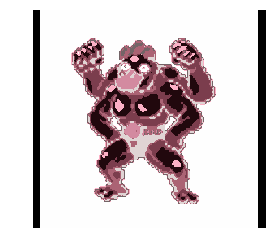

In [854]:
#construct mapping between two central points
#actually, one solution is enough. For convenience, we directly map the number of categories according to the number of categories.（OUTPUT_label_nums）

#input_mask

h = INPUT.shape[0]
w = INPUT.shape[1]

new_input = Image.new("RGB",(h,w))
INPUT_labels = INPUT_labels.reshape(h,w)

for i in range (0,h):
    for j in range (0,w):
        temp = INPUT_labels[i][j]
        r = int(OUTPUT_centers[temp][0])
        g = int(OUTPUT_centers[temp][1])
        b = int(OUTPUT_centers[temp][2])
        new_input.putpixel([i,j],(r,g,b))
            
new_input = new_input.rotate(-90)  
new_input = new_input.transpose(Image.FLIP_LEFT_RIGHT) 
plt.axis('off')
plt.imshow(new_input)  
new_input.save("result.png")

In [726]:
#make gif
import matplotlib.pyplot as plt
import imageio,os

INDEX_num = 77
def INDEX(i):
    if i>=10:
        return str(i)
    else:
        return '0'+str(i)

def remove_mask(s):  
    img=np.array(Image.open('/home/dedekinds/deep-photo-styletransfer-tf/examples/segmentation/out_000'+INDEX(s)+'.png'))#out_00071.png
    INPUT = np.array(Image.open(str(s)+'.png'))
    c = Image.new("RGB",img.shape)   
    for i in range (0,img.shape[0]):
        for j in range (0,img.shape[1]):
            if img[i,j]:
                c.putpixel([i,j],(INPUT[i,j,0],INPUT[i,j,1],INPUT[i,j,2]))
            else:
                c.putpixel([i,j],(0,0,0))

    c = c.rotate(-90)  
    c = c.transpose(Image.FLIP_LEFT_RIGHT)
    #print(str(s))
    c.save(str(s)+'_without_mask.png')
    
    
images = []
#filenames=sorted((fn for fn in os.listdir('.') if fn.endswith('.png')))
filenames = []


for i in range(INDEX_num):
    remove_mask(i)
    filenames.append(str(i)+'_without_mask.png')
    
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('gif.gif', images,duration=0.04)

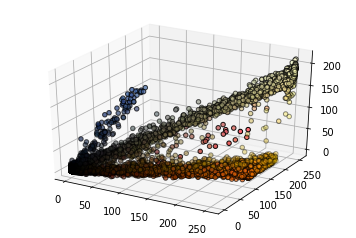

In [14]:
#(INPUT  OUTPUT)original color distribution
img = INPUT

from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = img[:,:,0].reshape(-1,1)
y = img[:,:,1].reshape(-1,1)
z = img[:,:,2].reshape(-1,1)
rgb = np.concatenate((x,y,z),axis=1)/255
ax.scatter(x, y, z, edgecolors='k', facecolors=rgb)

#ax.scatter(x, y, s=100, facecolors=rgb, edgecolors='k')
plt.show()

In [34]:
np.shape(INPUT)

(132, 126, 3)

In [35]:
np.shape(INPUT_labels)

(16632,)

In [36]:
132*126

16632

In [40]:
OUTPUT_centers[0][0]

253.62920474431746

In [ ]:
import os

num = 78
style_image = 'lym.jpg'
style_mask = 'out_00000.png'

def INDEX(i):
    if i>=10:
        return str(i)
    else:
        return '0'+str(i)

for i in range(num):
    os.system('python deep_photostyle_gif.py --content_image_path ./examples/input/000'+INDEX(i)+'.jpg --style_image_path ./examples/style/'+style_image+' --content_seg_path ./examples/segmentation/out_000'+INDEX(i)+'.png --style_seg_path ./examples/segmentation/'+style_mask+' --style_option 2 --output_image '+str(i)+'.png')